***Yunus Emre Kökboyu***

# **Gerekli Yüklemeleri Yapıyoruz...**

Önemli not Kullanılan veri seti Kaggle sitesinden alınmıştır.

[Veri Seti linki 16-04-2024](https://www.kaggle.com/datasets/chopper53/data-engineer-salary-in-2024/data)

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as npr
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


# **Veri setimizi Yüklüyoruz...**

In [ ]:
df = pd.read_csv("/content/salaries (2).csv")
df.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,SE,FT,AI Engineer,202730,USD,202730,US,0,US,M
1,2024,SE,FT,AI Engineer,92118,USD,92118,US,0,US,M
2,2024,SE,FT,Data Engineer,130500,USD,130500,US,0,US,M
3,2024,SE,FT,Data Engineer,96000,USD,96000,US,0,US,M
4,2024,SE,FT,Machine Learning Engineer,190000,USD,190000,US,0,US,M
5,2024,SE,FT,Machine Learning Engineer,160000,USD,160000,US,0,US,M
6,2024,MI,FT,ML Engineer,400000,USD,400000,US,0,US,M
7,2024,MI,FT,ML Engineer,65000,USD,65000,US,0,US,M
8,2024,EN,FT,Data Analyst,101520,USD,101520,US,0,US,M
9,2024,EN,FT,Data Analyst,45864,USD,45864,US,0,US,M


# **Veri Seti Hakkında Bilgi**
work_year: Verilerin toplandığı yıl (2024).
experience_level: Çalışanların deneyim seviyeleri sırasıyla Senior Engineer (SE), Mid-Level Engineer (MI), veya Entry-Level Engineer (EL) olarak kategorize edilmiştir.
employment_type: Çalışma zamanları Tam Zamanlı (FT), Yarı Zamanlı (PT), Kontratlı (C), veya Serbest Çalışan (F) olarak belirtilmiştir.
job_title: Şirket içindeki çalışanların ünvanları. Örneğin, AI Engineer.
salary: Yerel para birimine göre alınan maaş (örneğin, 202,730).
salary_currency: Paranın birimi.
salary_in_usd: Yerel para birimine göre olan maaşın dolar bazında tutulduğu sütun.
employee_residence: Çalışanın ikamet ettiği ülke.
remote_ratio: Pozisyonda izin verilen uzaktan çalışmanın kapsamını gösteren oran (uzaktan çalışma olmaması için 0, tamamen uzaktan çalışma için 1).
company_location: Şirketin bulunduğu ülke.
company_size: Şirketin büyüklüğü, çoğunlukla çalışan sayısına göre baz alınmıştır (küçük için S, orta için M, büyük için L).


# Veri setimizde kaç veri ve kaç sütun var?

In [ ]:
df.shape

(16534, 11)

# Veri setimizin sütun tipleri nelerdir?

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           16534 non-null  int64 
 1   experience_level    16534 non-null  object
 2   employment_type     16534 non-null  object
 3   job_title           16534 non-null  object
 4   salary              16534 non-null  int64 
 5   salary_currency     16534 non-null  object
 6   salary_in_usd       16534 non-null  int64 
 7   employee_residence  16534 non-null  object
 8   remote_ratio        16534 non-null  int64 
 9   company_location    16534 non-null  object
 10  company_size        16534 non-null  object
dtypes: int64(4), object(7)
memory usage: 1.4+ MB


# Veri setimizin sayısal verileri üzerinde analiz yapıyoruz...

In [ ]:
print(df.describe().T)

                 count           mean            std      min       25%  \
work_year      16534.0    2023.226866       0.713558   2020.0    2023.0   
salary         16534.0  163726.962683  340205.744183  14000.0  101763.0   
salary_in_usd  16534.0  149686.777973   68505.293156  15000.0  101125.0   
remote_ratio   16534.0      32.003750      46.245158      0.0       0.0   

                    50%       75%         max  
work_year        2023.0    2024.0      2024.0  
salary         142200.0  187200.0  30400000.0  
salary_in_usd  141300.0  185900.0    800000.0  
remote_ratio        0.0     100.0       100.0  


# Boşluk Analizi

In [ ]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Göründüğü gibi boş verimiz yok

# **Grafikler**

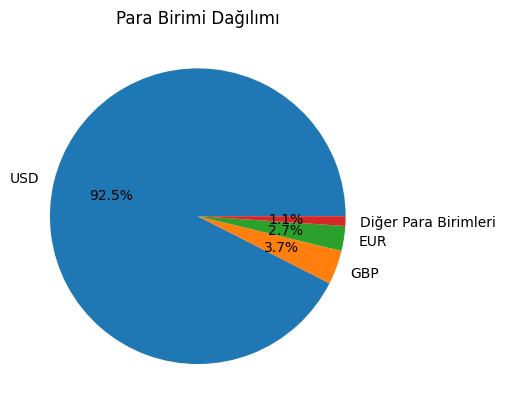

In [ ]:
tur_counts = df["salary_currency"].value_counts().to_dict()


en_cok_kullanilan_para_birimleri = sorted(tur_counts, key=tur_counts.get, reverse=True)[:3]


diger_para_birimleri = sum([tur_counts[currency] for currency in tur_counts if currency not in en_cok_kullanilan_para_birimleri])


labels = en_cok_kullanilan_para_birimleri + ["Diğer Para Birimleri"]
values = [tur_counts[currency] for currency in en_cok_kullanilan_para_birimleri] + [diger_para_birimleri]


fig, ax = plt.subplots()
ax.pie(values, labels=labels, autopct="%1.1f%%")
ax.set_title("Para Birimi Dağılımı")

plt.show()


Yukarıda görünen pasta grafiğinde en çok kullanılan para birimi %93 ile 'USD' oluyor, sonrasında %4 ile 'GBP', ardından %3 ile 'EUR' geliyor. 'Diğer Para Birimleri' ise %1'lik kısmı karşılıyor. Kısacası, maaşlar genellikle 'USD' ile ödeniyor diyebiliriz.
.

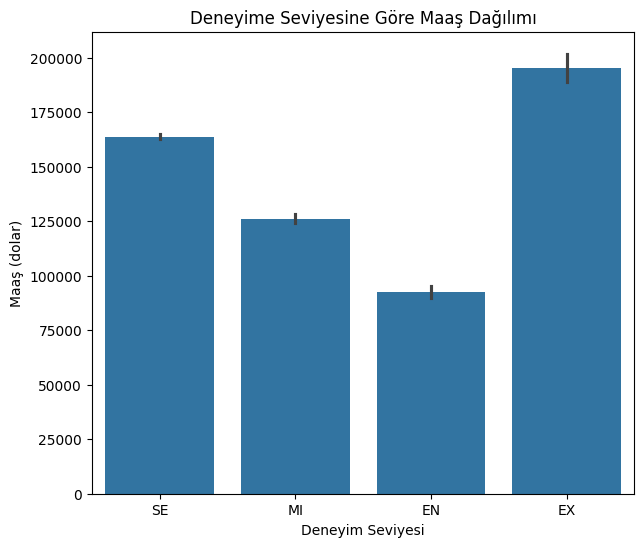

In [ ]:
plt.figure(figsize=(7, 6))

sns.barplot(x='experience_level', y='salary_in_usd', data=df)

plt.title('Deneyime Seviyesine Göre Maaş Dağılımı')
plt.xlabel('Deneyim Seviyesi')
plt.ylabel('Maaş (dolar)')

plt.show()

Yukarıda verilen grafiğe göre en çok maaş alan 'EX' deneyim seviyesine sahip olanlardır. En az maaşı alanlar ise 'EN' deneyim seviyesine sahiptir.
Kısacası deneyim arttıkça alınan maaş artar diyebiliriz.

# **Aykırı Veri Analizi**

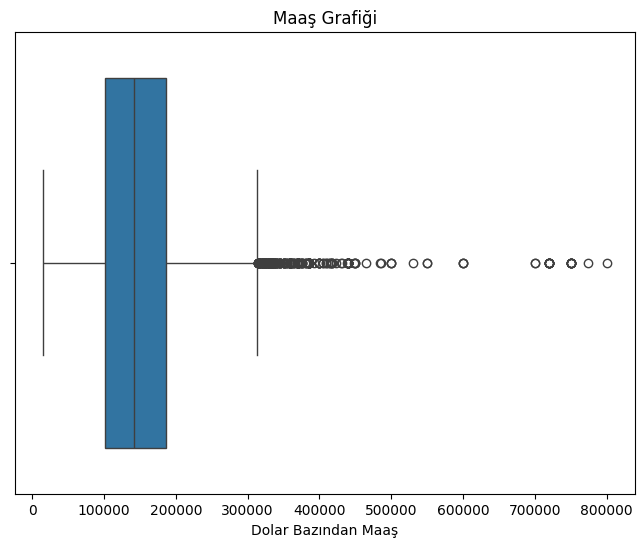

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Maaş Grafiği')
plt.xlabel('Dolar Bazından Maaş')
plt.show()

Yukarıdaki grafikte göründüğü gibi yuvarlak noktalar aykırı verilerdir.
Aşağıdaki kodlar ise analizlerin yapıldığı sınırların belirlendiği (bknz. q1, q3, IQR, high) ve sınırın üstünde kalanların sınıra eşitlendiği (baskılandığı) kodu göstermektedir.

In [ ]:
q1=df["salary_in_usd"].quantile(0.25)
q3=df["salary_in_usd"].quantile(0.75)
IQR=q3-q1
high = q3+1.5*IQR
print("Q1", q1)
print("Q3", q3)
print("IQR", IQR)
print("Üst sınır", high)
df.loc[(df["salary_in_usd"]>high,"salary_in_usd")]=high





Q1 101125.0
Q3 185900.0
IQR 84775.0
Üst sınır 313062.5


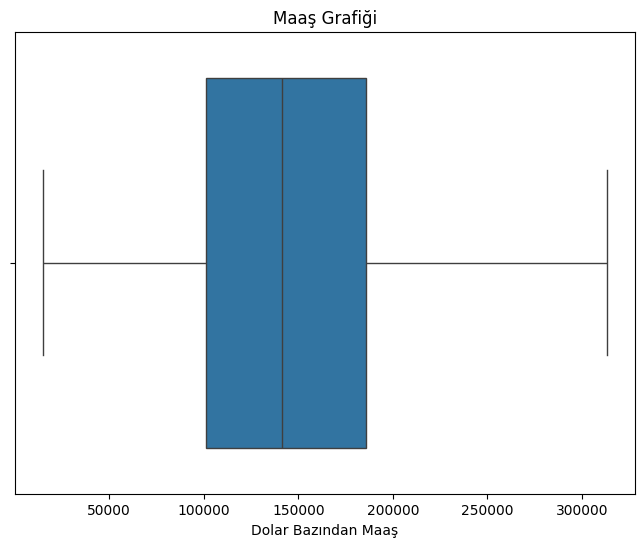

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['salary_in_usd'])
plt.title('Maaş Grafiği')
plt.xlabel('Dolar Bazından Maaş')
plt.show()

Yukarıda göründüğü gibi aykırı verilerimizi temizlemiş durumdayız. Artık grafiğimiz daha temiz gözüküyor.

# **Kategorik verilerin Analizi**

In [ ]:
cat_col=[col for col in df.columns if(df[col].dtypes in["category","object","bool"])]


Yukarıdaki kod, metinsel verilerin sütunlarını liste halinde alacak şekilde tasarlanmıştır

In [ ]:
for col in cat_col:
  print(df[col].value_counts(),"\n")

experience_level
SE    10670
MI     4038
EN     1325
EX      501
Name: count, dtype: int64 

employment_type
FT    16454
PT       38
CT       28
FL       14
Name: count, dtype: int64 

job_title
Data Engineer                    3464
Data Scientist                   3314
Data Analyst                     2440
Machine Learning Engineer        1705
Research Scientist                531
                                 ... 
Quantitative Research Analyst       1
AWS Data Architect                  1
Analytics Engineering Manager       1
Marketing Data Scientist            1
Applied Research Scientist          1
Name: count, Length: 155, dtype: int64 

salary_currency
USD    15294
GBP      616
EUR      449
CAD       56
INR       55
AUD       12
CHF        8
PLN        7
SGD        6
BRL        5
DKK        4
JPY        4
TRY        3
HUF        3
ILS        2
NOK        2
THB        2
NZD        1
PHP        1
ZAR        1
HKD        1
MXN        1
CLP        1
Name: count, dtype: int64 

emp

Yukarıdaki kod, daha önce listeye alınmış olan sütunlardaki verilerin sayısını ve veriyi bir döngü içinde basitçe yazdırır.

# **Makine Öğrenmesine Hazırlık**

In [ ]:
df=df.drop("salary",axis=1)
for col in cat_col:
  df[col]=LabelEncoder().fit_transform(df[col])
  print(df[col].value_counts(),"\n")

df.head(10)

experience_level
3    10670
2     4038
0     1325
1      501
Name: count, dtype: int64 

employment_type
2    16454
3       38
0       28
1       14
Name: count, dtype: int64 

job_title
57     3464
90     3314
46     2440
120    1705
147     531
       ... 
144       1
9         1
12        1
134       1
16        1
Name: count, Length: 155, dtype: int64 

salary_currency
21    15294
7       616
6       449
2        56
11       55
0        12
3         8
17        7
18        6
1         5
5         4
12        4
20        3
9         3
10        2
14        2
19        2
15        1
16        1
22        1
8         1
13        1
4         1
Name: count, dtype: int64 

employee_residence
84    14467
31      686
12      453
28      137
21       98
      ...  
83        1
57        1
71        1
65        1
53        1
Name: count, Length: 88, dtype: int64 

company_location
74    14518
27      694
11      455
24      133
18      105
      ...  
2         1
64        1
0         1
21  

,work_year,experience_level,employment_type,job_title,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,3,2,2,21,202730.0,84,0,74,1
1,2024,3,2,2,21,92118.0,84,0,74,1
2,2024,3,2,57,21,130500.0,84,0,74,1
3,2024,3,2,57,21,96000.0,84,0,74,1
4,2024,3,2,120,21,190000.0,84,0,74,1
5,2024,3,2,120,21,160000.0,84,0,74,1
6,2024,2,2,116,21,313062.5,84,0,74,1
7,2024,2,2,116,21,65000.0,84,0,74,1
8,2024,0,2,46,21,101520.0,84,0,74,1
9,2024,0,2,46,21,45864.0,84,0,74,1


Yukarıdaki kod, metinsel verileri LabelEncoder kullanarak sayısal verilere dönüştürmemizi sağlar.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16534 entries, 0 to 16533
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   work_year           16534 non-null  int64  
 1   experience_level    16534 non-null  int64  
 2   employment_type     16534 non-null  int64  
 3   job_title           16534 non-null  int64  
 4   salary_currency     16534 non-null  int64  
 5   salary_in_usd       16534 non-null  float64
 6   employee_residence  16534 non-null  int64  
 7   remote_ratio        16534 non-null  int64  
 8   company_location    16534 non-null  int64  
 9   company_size        16534 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 1.3 MB


In [ ]:
X=df.drop("salary_in_usd" ,axis=1)
y=df["salary_in_usd"]

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


Yukarıdaki kodda bağımlı ve bağımsız değişkenler oluşturulur ve train_test_split ile tüm verilerin %20'sini test boyutu olarak ayarlanır.

In [ ]:
model=LinearRegression()
model.fit(X_train,y_train)



LinearRegression()

"Yukarıdaki kod, LinearRegression sınıfından bir model oluşturuluyor. Oluşturulan model X_train ve y_train verilerini kullanarak eğitiliyor.

In [ ]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)




print('Karekök Ortalama Kare Hatası (RMSE):', rmse)
print('Ortalama Kare Hatası (MSE):', mse)
print("Ortalama Mutlak Değerlerinin  hatası:", mae)



Karekök Ortalama Kare Hatası (RMSE): 56386.38739216246
Ortalama Kare Hatası (MSE): 3179424683.139018
Ortalama Mutlak Değerlerinin  hatası: 44685.61049747448


Yukarıdaki kod, eğitilmiş modelimiz olan model kullanılarak X_test verileri üzerinde tahminler yapılır ve bunları y_pred değişkeninde saklar.
Ekran Çıktılarında ise hata miktarlarını vermektedir.

In [ ]:
data = pd.DataFrame(
    {'work_year': [2024], 'experience_level': [3], 'employment_type': [2], 'job_title': [3], 'salary_currency': [3], 'employee_residence': [84], 'remote_ratio': [3], 'company_location': [1], 'company_size': [0]}
)
tahmin_maas=model.predict(data)
print("Tahmini maas: ",tahmin_maas)





Tahmini maas:  [80115.83996056]


Yukarıdaki kod, önceden hazırlanmış tahmin edilecek veriler data değişkenine atanır. Ardından bu veriler, modele verilerek maaş tahmini yapılır. Örnek bir ekran çıktısında görüldüğü gibi, tahmini maaş 'usd' cinsinden 65.520 dolardır.

https://youtu.be/jsFWm1nYycs?feature=shared

***Yunus Emre Kökboyu***